In [1]:
import numpy as np  # For numerical operations and handling arrays  
import pandas as pd  # For data manipulation and analysis  

In [2]:
match = pd.read_csv('matches.csv')  # Load match data from CSV file into a DataFrame  
delivery = pd.read_csv('deliveries.csv')  # Load delivery data from CSV file into a DataFrame  

In [3]:
match.head(1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [4]:
delivery.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [5]:
# Calculate total score for each match and each inning  
# Group by 'match_id' and 'inning', then sum the 'total_runs' column  
total_score_df = delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()  

# Display the total score DataFrame  
total_score_df  

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [6]:
# Filter to keep only the first inning scores  
total_score_df = total_score_df[total_score_df['inning'] == 1]  

In [7]:
# Merge total_score_df with match DataFrame to add total runs of the first inning to each match  
# Match 'id' column from match DataFrame with 'match_id' column from total_score_df  
match_df = match.merge(total_score_df[['match_id', 'total_runs']], left_on='id', right_on='match_id')  

In [8]:
match_df.head(1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207


In [9]:
# Get unique team names from the 'team1' column  
match_df['team1'].unique()  

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
# List of IPL teams  
teams = [  
    'Sunrisers Hyderabad',  
    'Mumbai Indians',  
    'Royal Challengers Bangalore',  
    'Kolkata Knight Riders',  
    'Kings XI Punjab',  
    'Chennai Super Kings',  
    'Rajasthan Royals',  
    'Delhi Capitals'  
]  

In [11]:
# Standardize team names by replacing old names with current names  
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')  
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')  

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')  
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')  


In [12]:
# Keep only matches where both team1 and team2 are in the defined list of teams  
match_df = match_df[match_df['team1'].isin(teams)]  
match_df = match_df[match_df['team2'].isin(teams)]  

In [13]:
match_df.shape

(641, 20)

In [14]:
match_df.head(1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207


In [15]:
# Count the occurrences of values in the 'dl_applied' column  
match_df['dl_applied'].value_counts()  

dl_applied
0    626
1     15
Name: count, dtype: int64

In [16]:
# Filter out matches where D/L method was applied (keep only where 'dl_applied' is 0)  
match_df = match_df[match_df['dl_applied'] == 0]  

# Display the filtered DataFrame  
match_df.head(1)  

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207


In [17]:
# Keep only important columns from match_df for merging with delivery.csv  
match_df = match_df[['match_id', 'city', 'winner', 'total_runs']]  

In [18]:
# Merge delivery data with match data using 'match_id'  
delivery_df = match_df.merge(delivery, on='match_id')  

# Display the merged DataFrame  
delivery_df.head(1)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [19]:
# Keep only rows where 'inning' value is 2  
delivery_df = delivery_df[delivery_df['inning'] == 2]  

# Display the filtered DataFrame  
delivery_df.head(1)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [20]:
# runs_left and balls-left
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [21]:
# Calculate cumulative score for each match in the second inning  
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()  

# Display the updated DataFrame  
delivery_df.head(1)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1


In [22]:
# Calculate runs left to win in the second inning  
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']  

# Display the updated DataFrame  
delivery_df.head(1)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,206


In [23]:
#  balls-left
delivery_df['balls-left'] = 126- (delivery_df['over']*6 + delivery_df['ball'])
delivery_df.head(1)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls-left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119


In [24]:
# Handle missing values in 'player_dismissed' column  
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")  

# Convert to binary format (0 = not dismissed, 1 = dismissed)  
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: x if x == "0" else "1")  

# Convert to integer type  
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')  

In [25]:
# Calculate cumulative wickets lost for each match in the second inning  
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum()  

In [26]:
# Calculate remaining wickets in the second inning  
delivery_df['wickets'] = 10 - wickets  

# Display the first few rows of the updated DataFrame  
delivery_df.head(1)  

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls-left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10


In [27]:
delivery_df.tail(1)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls-left,wickets
149577,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,1,lbw,NaN,157,-5,0,3


In [28]:
# Calculate current run rate (CRR) = (current_score * 6) / overs bowled  
delivery_df['crr'] = (delivery_df['current_score'] * 6) / (120 - delivery_df['balls-left'])  

# Display the first 5 rows of the updated DataFrame  
delivery_df.head(1)  

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls-left,wickets,crr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,NaN,NaN,1,206,119,10,6.0


In [29]:
# Calculate required run rate (RRR) = (runs left * 6) / balls left  
delivery_df['rrr'] = (delivery_df['runs_left'] * 6) / delivery_df['balls-left']  

# Display the first 5 rows of the updated DataFrame  
delivery_df.head(1)  

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls-left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.0,10.386555


In [30]:
# Define a function to determine the match result (1 = win, 0 = loss)  
def result(row):  
    return 1 if row['batting_team'] == row['winner'] else 0  


In [31]:
# Apply the result function to determine match outcome  
delivery_df['result'] = delivery_df.apply(result, axis=1)  

# Select relevant columns for the final DataFrame  
final_df = delivery_df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls-left', 'wickets', 'total_runs_x', 'crr', 'rrr', 'result']]  

# Shuffle the rows of the final DataFrame  
final_df = final_df.sample(final_df.shape[0])  

# Display a random sample row from the final DataFrame  
final_df.sample()  


,batting_team,bowling_team,city,runs_left,balls-left,wickets,total_runs_x,crr,rrr,result
1185,Mumbai Indians,Sunrisers Hyderabad,Mumbai,24,23,6,158,8.28866,6.26087,1


In [32]:
final_df.dropna(inplace=True)

In [33]:
# Remove rows where 'balls-left' is 0  
final_df = final_df[final_df['balls-left'] != 0]  

# Model Fit

In [35]:
# Split data into features (X) and target (y)  
X = final_df.iloc[:, :-1]  # All columns except the last one (features)  
y = final_df.iloc[:, -1]   # Last column (target)  

In [36]:
X

,batting_team,bowling_team,city,runs_left,balls-left,wickets,total_runs_x,crr,rrr
61650,Kolkata Knight Riders,Kings XI Punjab,Kolkata,8,6,4,134,6.631579,8.000000
118100,Kings XI Punjab,Kolkata Knight Riders,Kolkata,34,17,5,164,7.572816,12.000000
103856,Chennai Super Kings,Mumbai Indians,Mumbai,78,77,10,183,14.651163,6.077922
119691,Sunrisers Hyderabad,Kings XI Punjab,Chandigarh,142,93,10,179,8.222222,9.161290
109394,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,141,96,8,167,6.500000,8.812500
...,...,...,...,...,...,...,...,...,...
84945,Rajasthan Royals,Sunrisers Hyderabad,Hyderabad,100,81,10,136,5.538462,7.407407
53543,Kings XI Punjab,Mumbai Indians,Mumbai,74,38,6,159,6.219512,11.684211
48491,Mumbai Indians,Delhi Daredevils,Delhi,26,45,8,95,5.520000,3.466667
116070,Mumbai Indians,Royal Challengers Bangalore,Mumbai,163,109,9,170,3.818182,8.972477


In [37]:
y

61650     0
118100    0
103856    1
119691    1
109394    0
         ..
84945     0
53543     0
48491     1
116070    1
98562     0
Name: result, Length: 71342, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split  

# Split data into training and testing sets (80% train, 20% test)  
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                    test_size=0.2,  
                                                    random_state=1)  

# Display the shape of training and testing sets  
X_train.shape, X_test.shape  


((57073, 9), (14269, 9))

In [39]:
X_train

,batting_team,bowling_team,city,runs_left,balls-left,wickets,total_runs_x,crr,rrr
56612,Rajasthan Royals,Mumbai Indians,Mumbai,105,99,10,133,8.000000,6.363636
54738,Delhi Daredevils,Mumbai Indians,Mumbai,133,68,6,178,5.192308,11.735294
90247,Delhi Daredevils,Mumbai Indians,Sharjah,115,112,10,125,7.500000,6.160714
139862,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,71,47,5,142,5.835616,9.063830
148282,Kings XI Punjab,Chennai Super Kings,Mohali,120,97,10,172,13.565217,7.422680
...,...,...,...,...,...,...,...,...,...
79007,Royal Challengers Bangalore,Mumbai Indians,Mumbai,124,53,5,194,6.268657,14.037736
25052,Kings XI Punjab,Royal Challengers Bangalore,Durban,16,11,6,145,7.100917,8.727273
55387,Royal Challengers Bangalore,Rajasthan Royals,Jaipur,145,119,10,146,6.000000,7.310924
127200,Kolkata Knight Riders,Delhi Daredevils,Delhi,188,99,7,223,10.000000,11.393939


In [40]:
X_test

,batting_team,bowling_team,city,runs_left,balls-left,wickets,total_runs_x,crr,rrr
78577,Kolkata Knight Riders,Kings XI Punjab,Kolkata,-1,9,6,149,8.108108,-0.666667
40072,Chennai Super Kings,Royal Challengers Bangalore,Chennai,88,69,9,161,8.588235,7.652174
84997,Rajasthan Royals,Sunrisers Hyderabad,Hyderabad,63,30,5,136,4.866667,12.600000
127237,Kolkata Knight Riders,Delhi Daredevils,Delhi,145,62,5,223,8.068966,14.032258
95124,Chennai Super Kings,Rajasthan Royals,Ranchi,106,89,8,148,8.129032,7.146067
...,...,...,...,...,...,...,...,...,...
123088,Royal Challengers Bangalore,Kings XI Punjab,Bengaluru,114,81,8,161,7.230769,8.444444
3713,Kolkata Knight Riders,Delhi Daredevils,Kolkata,135,103,9,160,8.823529,7.864078
6780,Delhi Daredevils,Royal Challengers Bangalore,Delhi,77,54,8,161,7.636364,8.555556
143674,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata,171,75,7,219,6.400000,13.680000


In [41]:
from sklearn.compose import ColumnTransformer  
from sklearn.preprocessing import OneHotEncoder  

# Apply OneHotEncoding to categorical columns  
trf = ColumnTransformer([  
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])  
], remainder='passthrough')  


In [42]:
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['batting_team', 'bowling_team', 'city'])])

In [43]:
# create a pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [44]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
    #('step2',RandomForestClassifier())
])

In [45]:
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [46]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [47]:
# Replace infinity and -inf with NaN
X_train.describe()

,runs_left,balls-left,wickets,total_runs_x,crr,rrr
count,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000
mean,92.602071,62.872006,7.551487,165.702609,7.442934,10.371344
std,49.985597,33.308274,2.123413,29.233996,2.283178,13.513819
min,-16.000000,-2.000000,0.000000,65.000000,0.000000,-510.000000
25%,53.000000,35.000000,6.000000,147.000000,6.260870,7.153846
50%,92.000000,64.000000,8.000000,165.000000,7.500000,8.875000
75%,130.000000,92.000000,9.000000,185.000000,8.692308,10.892308
max,248.000000,119.000000,10.000000,250.000000,42.000000,582.000000


In [48]:
y_pred = pipe.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.800266311584554

In [50]:
pipe.predict_proba(X_test)[0]

array([0.05804385, 0.94195615])

In [51]:
import numpy as np

def match_progression(X_df, match_id, pipe):
    # Filter for the specific match and only for the last ball in each over
    match = X_df[X_df['match_id'] == match_id]
    match = match[match['ball'] == 6]

    # Calculate 'balls_left' if it doesn’t exist
    if 'balls-left' not in match.columns:
        total_balls = 120  # Assuming 20 overs per innings (adjust based on format)
        match['balls-left'] = total_balls - match['ball']  # Adjust 'ball' column reference

    # Select relevant columns and verify they exist in `match`
    required_columns = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls-left', 'wickets', 'total_runs_x', 'crr', 'rrr']
    for col in required_columns:
        if col not in match.columns:
            raise KeyError(f"Column '{col}' is missing in the DataFrame.")

    temp_df = match[required_columns]
    temp_df = temp_df[temp_df['balls-left'] != 0]

    # Predict probabilities using the provided pipeline
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0] * 100, 1)
    temp_df['win'] = np.round(result.T[1] * 100, 1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)

    # Extract target and calculate runs after each over
    target = temp_df['total_runs_x'].values[0]  # Ensure this column exists
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)

    # Calculate wickets lost in each over
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[:temp_df.shape[0]]

    # Output target and selected DataFrame columns
    print("Target:", target)
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    return temp_df, target

# Run the modified function
temp_df, target = match_progression(delivery_df, 1, pipe)
temp_df


Target: 207


,end_of_over,runs_after_over,wickets_in_over,lose,win
130,1,11,0,88.3,11.7
136,2,1,0,91.3,8.7
142,3,16,0,83.8,16.2
148,4,11,0,78.3,21.7
155,5,5,0,78.7,21.3
162,6,10,1,83.9,16.1
168,7,7,1,89.9,10.1
174,8,13,0,84.6,15.4
180,9,10,0,80.3,19.7
187,10,10,0,75.3,24.7


Text(0.5, 1.0, 'Target - 207')

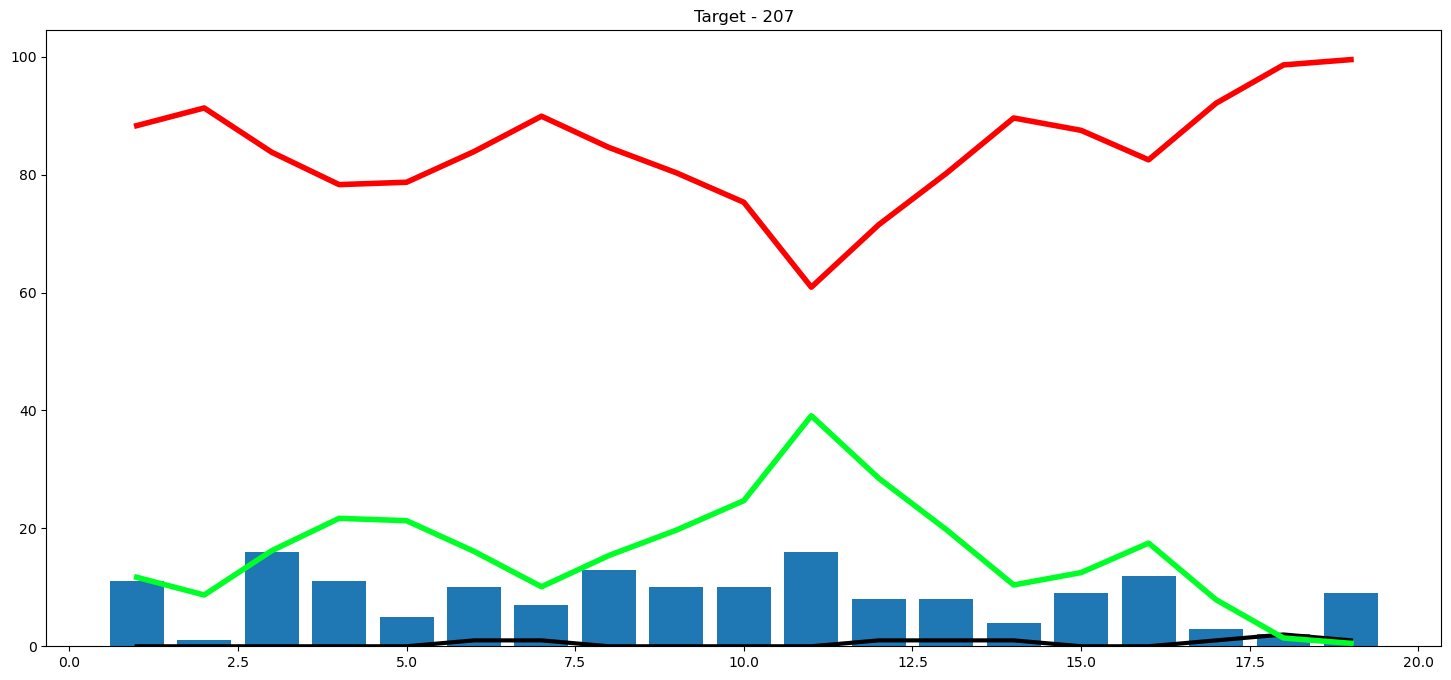

In [52]:
import matplotlib.pyplot as plt  

# Set figure size  
plt.figure(figsize=(18, 8))  

# Plot wickets in over  
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'], color='black', linewidth=3)  

# Plot win trend  
plt.plot(temp_df['end_of_over'], temp_df['win'], color='#00ff27', linewidth=4)  

# Plot lose trend  
plt.plot(temp_df['end_of_over'], temp_df['lose'], color='red', linewidth=4)  

# Plot runs after each over as a bar plot  
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'])  

# Set the title  
plt.title('Target - ' + str(target))  


In [ ]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [106]:
# Save